In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load your sentiment data
data = pd.read_csv('sentiment_data_cleaned_up.csv')
texts = data['headline'].tolist()
labels = data['sentiment'].tolist()

# Split the data into training, validation, and test sets
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42)

# Tokenize the text data
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_texts(texts, labels):
    tokens = tokenizer(
        texts,
        max_length=128,
        padding=True,
        truncation=True,
        return_tensors="tf"
    )
    return tokens, tf.convert_to_tensor(labels)

train_inputs, train_labels = tokenize_texts(train_texts, train_labels)
val_inputs, val_labels = tokenize_texts(val_texts, val_labels)
test_inputs, test_labels = tokenize_texts(test_texts, test_labels)

# Load the DistilBERT model for sequence classification
model = TFDistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', num_labels=len(set(labels)))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the model
history = model.fit(
    dict(train_inputs),
    train_labels,
    validation_data=(dict(val_inputs), val_labels),
    epochs=3,
    batch_size=16
)

# Evaluate the model
results = model.evaluate(dict(test_inputs), test_labels)
print(f"Test Accuracy: {results[1]:.4f}")

# Generate predictions
predicted_logits = model.predict(dict(test_inputs)).logits
predicted_labels = np.argmax(predicted_logits, axis=1)

# Classification report
print(classification_report(test_labels, predicted_labels))

# Save the model
model.save_pretrained('./distilbert_sentiment_model')
tokenizer.save_pretrained('./distilbert_sentiment_model')

print("Model and tokenizer saved.")

KeyboardInterrupt: 

In [6]:
from sklearn.model_selection import train_test_split
from transformers import pipeline
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from transformers import TFDistilBertForSequenceClassification
import pandas as pd
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from IPython.display import clear_output

In [7]:
import pandas as pd

headline_sentiment_data = pd.read_csv('./sentiment_data_cleaned_up.csv')

headline_sentiment_data

,sentiment,headline
0,0,the international electronic industry company ...
1,1,with the new production plant the company woul...
2,1,according to the company's updated strategy fo...
3,1,financing of aspocomp's growth aspocomp is agg...
4,1,for the last quarter of 2010 componenta's net...
...,...,...
1962,0,helsinki thomson financial shares in cargotec...
1963,0,london marketwatch share prices ended lower i...
1964,0,operating profit fell to eur 35.4 mn from eur ...
1965,0,net sales of the paper segment decreased to eu...


<ipython-input-8-51e15df9d721>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


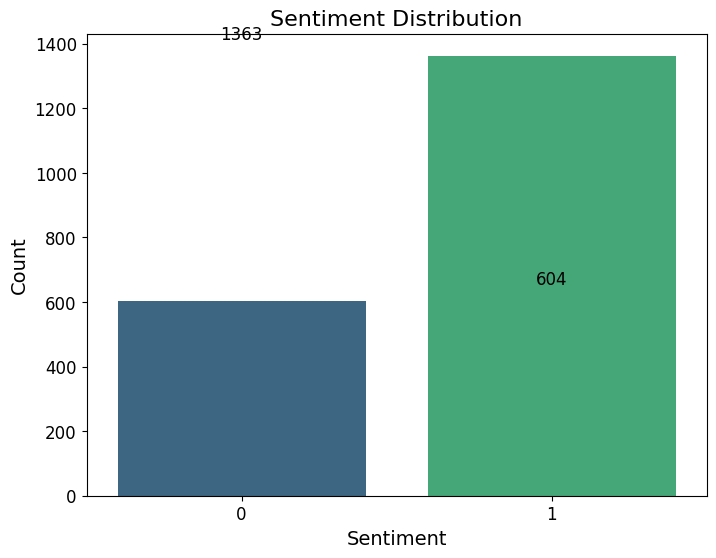

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = headline_sentiment_data['sentiment'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Add counts on top of bars
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [22]:
class PlotLearning(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.metric = []
        self.val_metric = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)

        print(f"Epoch {epoch + 1} logs: {logs}")

        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.metric.append(logs.get('sparse_categorical_accuracy'))
        self.val_metric.append(logs.get('val_sparse_categorical_accuracy'))
        self.i += 1

        fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        fig.set_size_inches(10.5, 7.5)
        fig.suptitle('Processing',size = 20)
        clear_output(wait=True)
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="Train Loss")
        ax1.plot(self.x, self.val_losses, label="Valid Loss")
        ax1.legend()


        ax2.plot(self.x, self.metric, label="Train_accuracy")
        ax2.plot(self.x, self.val_metric, label="Valid_accuracy")
        ax2.legend()

        plt.show();

plot = PlotLearning()

In [3]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [4]:
pip install --upgrade tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.0 MB/s eta 0:00:00
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-2.17.0:
      Successfully uninstalled tf_keras-2.17.0


In [21]:
# Split dataset into train and test sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    headline_sentiment_data['headline'],
    headline_sentiment_data['sentiment'],
    test_size=0.15,
    random_state=42
)

train_texts, test_texts, train_labels, test_labels = train_test_split(
    train_texts,
    train_labels,
    test_size=0.2,
    random_state=42
)

# Load tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)  # 2 sentiments

# Tokenize the dataset
def tokenize_data(texts, labels):
    inputs = tokenizer(
        list(texts),
        max_length=512,
        padding=True,
        truncation=True,
        return_tensors="tf"
    )
    return inputs, tf.convert_to_tensor(labels)

train_inputs, train_labels = tokenize_data(train_texts, train_labels)
test_inputs, test_labels = tokenize_data(test_texts, test_labels)
val_inputs, val_labels = tokenize_data(val_texts, val_labels)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_inputs), train_labels)).shuffle(len(train_texts)).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_inputs), test_labels)).batch(16)
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_inputs), val_labels)).batch(16)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['sparse_categorical_accuracy'])

model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Model: "tf_distil_bert_for_sequence_classification_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_59 (Dropout)        multiple                  0 (unused)
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


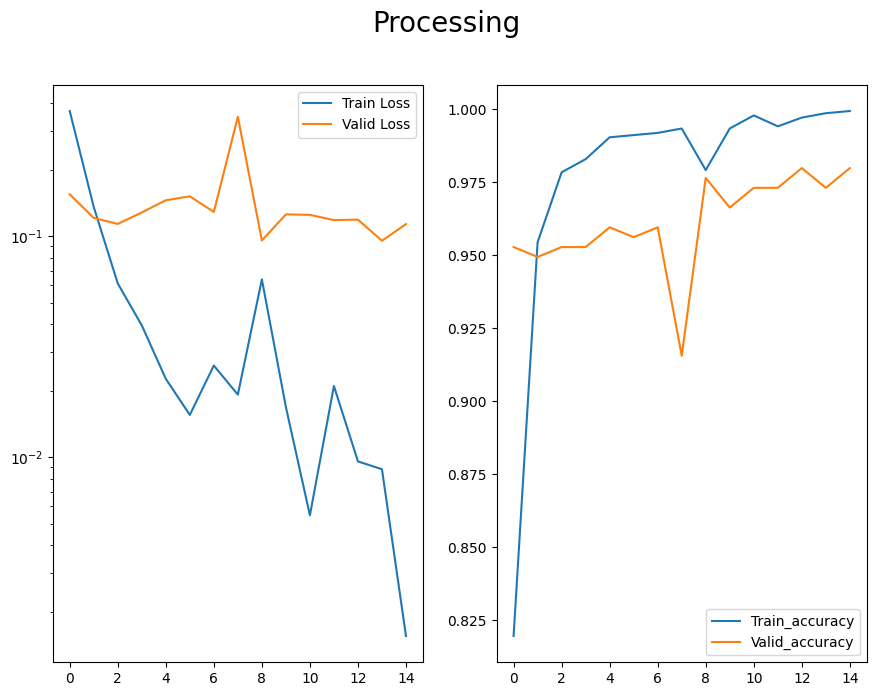

84/84 [==============================] - 116s 1s/step - loss: 0.0016 - sparse_categorical_accuracy: 0.9993 - val_loss: 0.1137 - val_sparse_categorical_accuracy: 0.9797


21/21 [==============================] - 9s 354ms/step - loss: 0.1556 - sparse_categorical_accuracy: 0.9642
Evaluation results: [0.15557986497879028, 0.9641790986061096]


In [23]:
# Train the model
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=15,
    callbacks=[plot]
)

# Save the model (Ensure this matches your model framework, e.g., TensorFlow, Hugging Face, etc.)
model.save('./distilbert_financial_sentiment_model')  # TensorFlow Model Save
tokenizer.save_pretrained('./distilbert_financial_sentiment_model')  # Hugging Face Tokenizer Save

# Evaluate the model
evaluation = model.evaluate(test_dataset)
print(f"Evaluation results: {evaluation}")

In [29]:
# Save the model (Ensure this matches your model framework, e.g., TensorFlow, Hugging Face, etc.)
model.save('/content/drive/My Drive/distilbert_financial_sentiment_model')
tokenizer.save_pretrained('/content/drive/My Drive/distilbert_financial_sentiment_model')  # Hugging Face Tokenizer Save

('/content/drive/My Drive/distilbert_financial_sentiment_model/tokenizer_config.json',
 '/content/drive/My Drive/distilbert_financial_sentiment_model/special_tokens_map.json',
 '/content/drive/My Drive/distilbert_financial_sentiment_model/vocab.txt',
 '/content/drive/My Drive/distilbert_financial_sentiment_model/added_tokens.json')

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sentiment_pipeline = pipeline('sentiment-analysis', framework='tf') # model='distilbert-base-uncased-finetuned-sst-2-english' as default


def get_transformer_sentiment(text):
    result = sentiment_pipeline(text[:512])  # Truncate if text is too long
    return result[0]['label'], result[0]['score']

combined_news['transformer_sentiment'] = headline_sentiment_data['headline'].apply(
    lambda x: get_transformer_sentiment(x)[0]
)
combined_news['transformer_confidence'] = headline_sentiment_data['headline'].apply(
    lambda x: get_transformer_sentiment(x)[1]
)
